In [73]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, dct

In [74]:
def W(x, size):
    return np.sqrt(1/size) if x == 0 else np.sqrt(2/size)

# Implementazione della DCT-2 fatta in casa
def dct2_home_made(x):
    N, M = x.shape

    cos_i = np.zeros((N, N))
    cos_j = np.zeros((M, M))
    # Precompute the cosine transform matrices
    for n in range(N):
        for s in range(N):
            cos_i[n, s] = np.cos(np.pi * s * (2 * n + 1) / (2 * N))
    
    for n in range(M):
        for r in range(M):
            cos_j[n, r] = np.cos(np.pi * r * (2 * n + 1) / (2 * M))
    
    # Apply the DCT transform on rows
    x_transformed = np.dot(cos_i, x)

    print("Transformed", cos_i)
    
    # Apply the DCT transform on columns
    x_transformed = np.dot(x_transformed, cos_j.T)

    print("Transformed 2", x_transformed)
    
    # Normalization
    alpha_i = W(1, N) * np.ones(N)
    alpha_j = W(1, M) * np.ones(M)
    alpha_i[0] = W(0, N)
    alpha_j[0] = W(0, M)
    
    X = x_transformed * alpha_i[:, None] * alpha_j[None, :]
    
    return X

# Utilizzo della DCT-2 dalla libreria scipy
def dct2_scipy(x):
    return dct(dct(x.T, norm='ortho').T, norm='ortho')

def fft2_scipy(x):
    return fft2(x)

# Function to measure execution time
def measure_time(func, x):
    start_time = time.time()
    result = func(x)
    end_time = time.time() - start_time
    return end_time

[[0.77078228 0.91115074]
 [0.65469576 0.82698818]]
Transformed [[ 1.          0.70710678]
 [ 1.         -0.70710678]]
Transformed 2 [[2.29149704 0.17594714]
 [0.53862924 0.07705569]]
Sizes: [2]
Home-made DCT2 times: [0.0]
Scipy DCT2 times: [0.0]


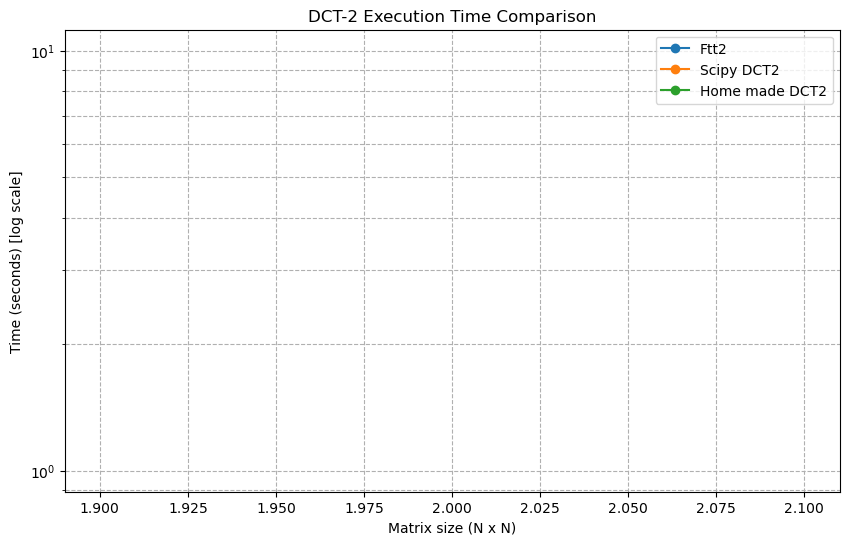

DCT2 home made
Transformed [[ 1.          0.98078528  0.92387953  0.83146961  0.70710678  0.55557023
   0.38268343  0.19509032]
 [ 1.          0.83146961  0.38268343 -0.19509032 -0.70710678 -0.98078528
  -0.92387953 -0.55557023]
 [ 1.          0.55557023 -0.38268343 -0.98078528 -0.70710678  0.19509032
   0.92387953  0.83146961]
 [ 1.          0.19509032 -0.92387953 -0.55557023  0.70710678  0.83146961
  -0.38268343 -0.98078528]
 [ 1.         -0.19509032 -0.92387953  0.55557023  0.70710678 -0.83146961
  -0.38268343  0.98078528]
 [ 1.         -0.55557023 -0.38268343  0.98078528 -0.70710678 -0.19509032
   0.92387953 -0.83146961]
 [ 1.         -0.83146961  0.38268343  0.19509032 -0.70710678  0.98078528
  -0.92387953  0.55557023]
 [ 1.         -0.98078528  0.92387953 -0.83146961  0.70710678 -0.55557023
   0.38268343 -0.19509032]]
Transformed 2 [[4550.54887907 -406.45561418 1180.90136569 -552.2647901   519.95627114
   553.5398482  1706.49272417  466.59857761]
 [-377.85435435  371.84027088 -15

In [75]:
# Sizes of matrices
sizes = [2]

# Lists to store execution times
times_fft2 = []
times_scipy = []
times_dct2_home_made = []

for size in sizes:
    x = np.random.rand(size, size)
    print(x)
    # Measure time for home-made DCT2
    time_dct2_home_made = measure_time(dct2_home_made, x)
    times_dct2_home_made.append(time_dct2_home_made)

    time_fft2 = measure_time(fft2_scipy, x)
    times_fft2.append(time_fft2)
    
    # Measure time for scipy DCT2
    time_scipy = measure_time(dct2_scipy, x)
    times_scipy.append(time_scipy)

# Displaying the results
print("Sizes:", sizes)
print("Home-made DCT2 times:", times_fft2)
print("Scipy DCT2 times:", times_scipy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogy(sizes, times_fft2, label='Ftt2', marker='o')
plt.semilogy(sizes, times_scipy, label='Scipy DCT2', marker='o')
plt.semilogy(sizes, times_dct2_home_made, label='Home made DCT2', marker='o')
plt.xlabel('Matrix size (N x N)')
plt.ylabel('Time (seconds) [log scale]')
plt.title('DCT-2 Execution Time Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

array = np.array([
    [231, 32, 233, 161, 24, 71, 140, 245],
    [247, 40, 248, 245, 124, 204, 36, 107],
    [234, 202, 245, 167, 9, 217, 239, 173],
    [193, 190, 100, 167, 43, 180, 8, 70],
    [11, 24, 210, 177, 81, 243, 8, 112],
    [97, 195, 203, 47, 125, 114, 165, 181],
    [193, 70, 174, 167, 41, 30, 127, 245],
    [87, 149, 57, 192, 65, 129, 178, 228]
])

print("DCT2 home made")
print(dct2_home_made(array))